In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

G:\Anacoda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [4]:
df_origi = pd.read_csv('credit_risk_dataset.csv')

In [5]:
df_origi.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [6]:
df_origi.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df_origi.shape

(32581, 12)

In [8]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [9]:
df_train.shape

(58645, 13)

In [10]:
df_train.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [11]:
df_train.describe()

id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [12]:
df_test.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                           2  
1                 0.10                         Y                           4  
2                 0.13                         Y                           2  
3                 0.14                         N                           7  
4                 0.15                         Y                           4

In [13]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

In [14]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [15]:
df_train.shape,df_test.shape

((58645, 12), (39098, 11))

In [16]:
df_train = pd.concat([df_train,df_origi],axis=0)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [18]:
df_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [19]:
df_test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean(), inplace=True)

C:\Users\雷神\AppData\Local\Temp\ipykernel_21336\1278148906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
C:\Users\雷神\AppData\Local\Temp\ipykernel_21336\1278148906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [21]:
df_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

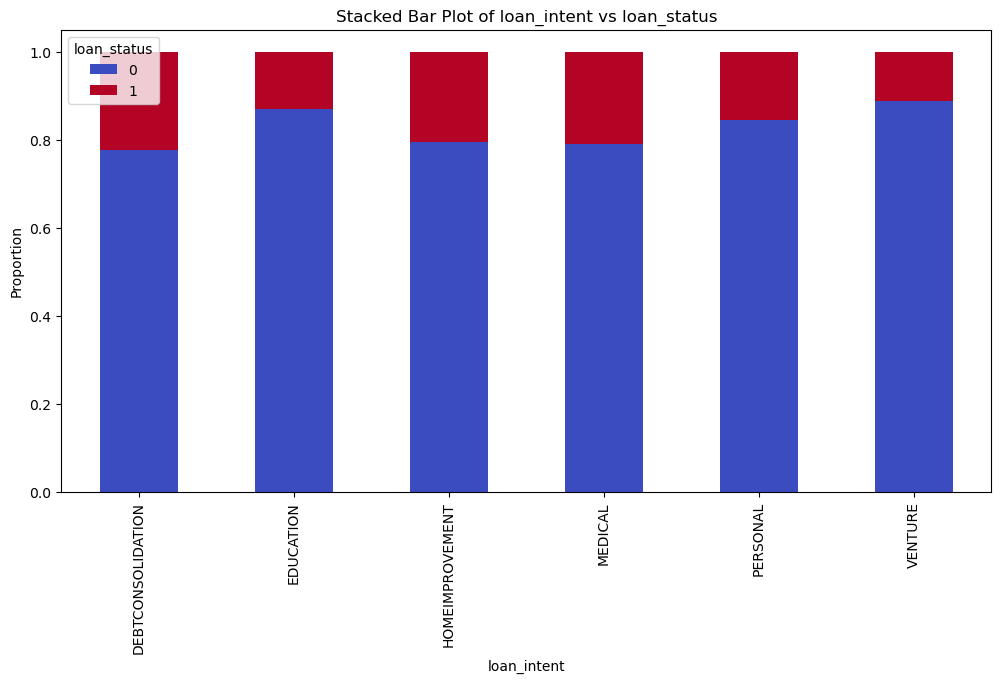

In [22]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(df_train, 'loan_intent')

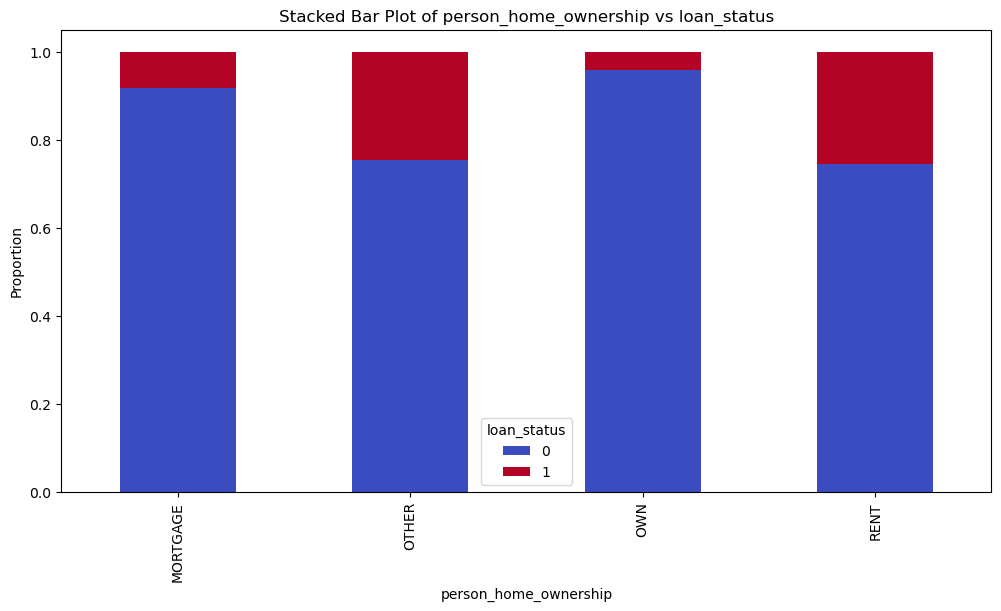

In [23]:
stacked_bar_plot(df_train, 'person_home_ownership')

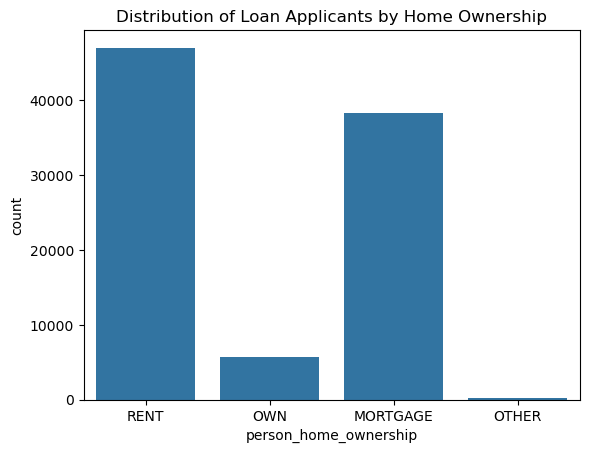

In [24]:
sns.countplot(data=df_train, x='person_home_ownership')
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()

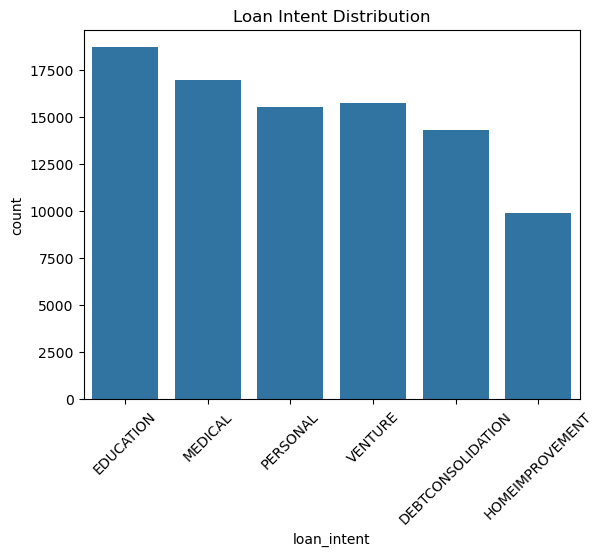

In [25]:
sns.countplot(data=df_train, x='loan_intent')
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.show()

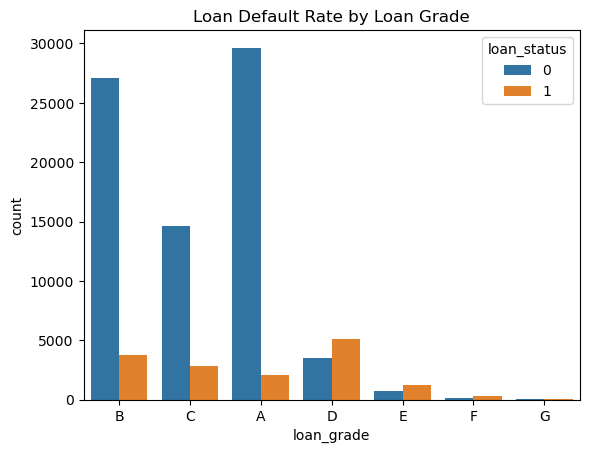

In [26]:
sns.countplot(data=df_train, x='loan_grade', hue='loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()

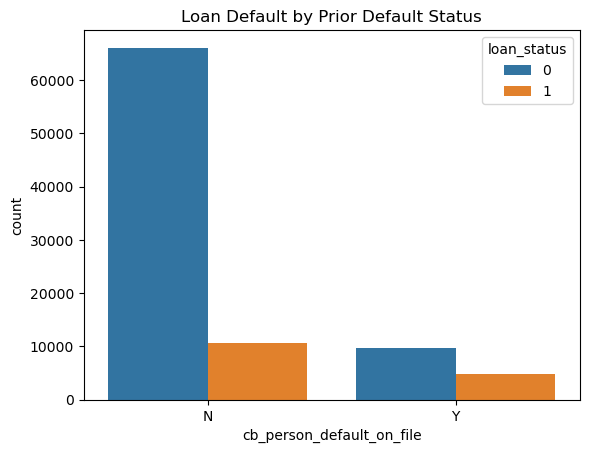

In [27]:
sns.countplot(data=df_train, x='cb_person_default_on_file', hue='loan_status')
plt.title('Loan Default by Prior Default Status')
plt.show()

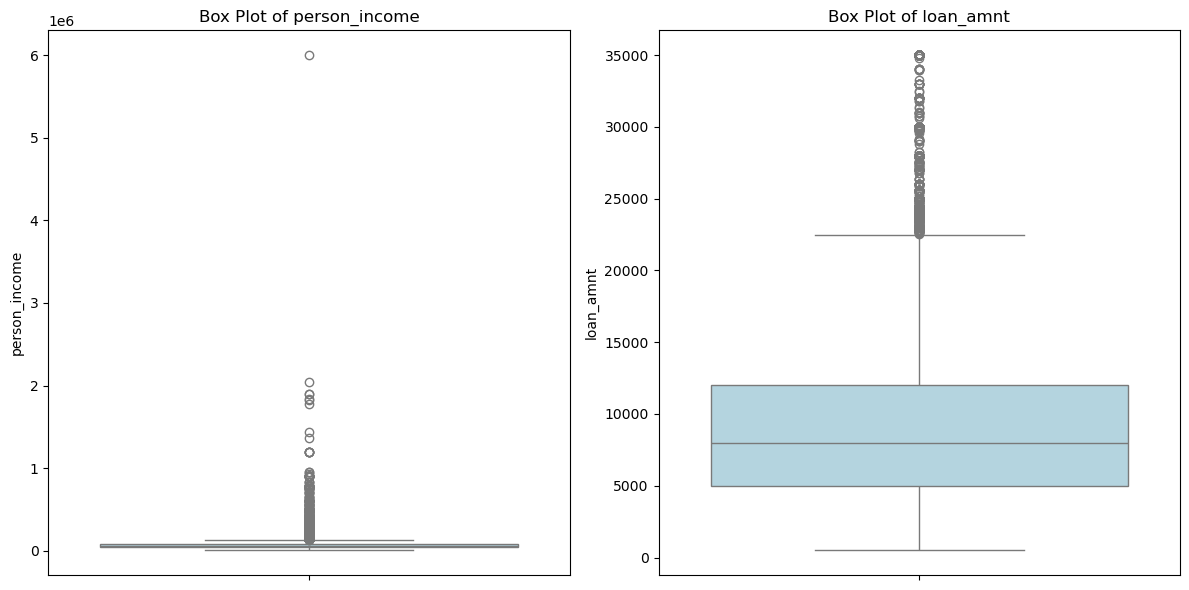

In [28]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df_train, ['person_income', 'loan_amnt'])

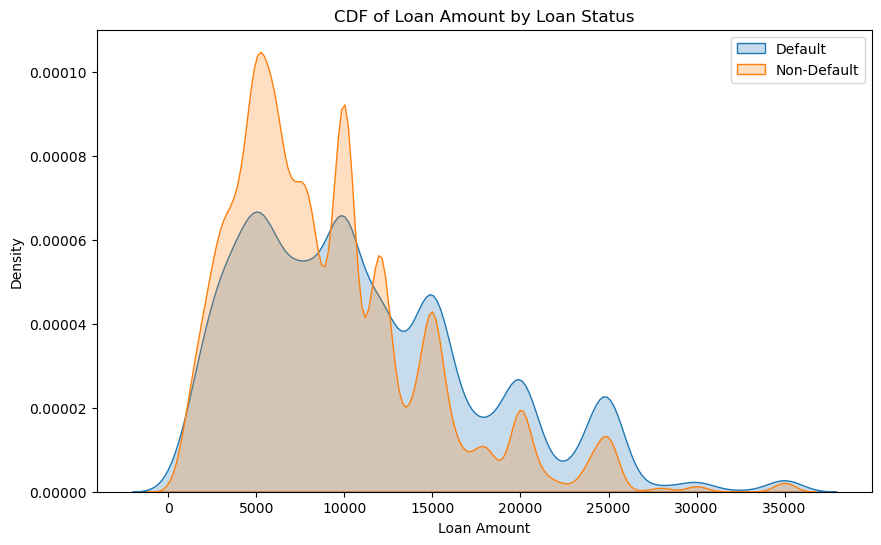

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

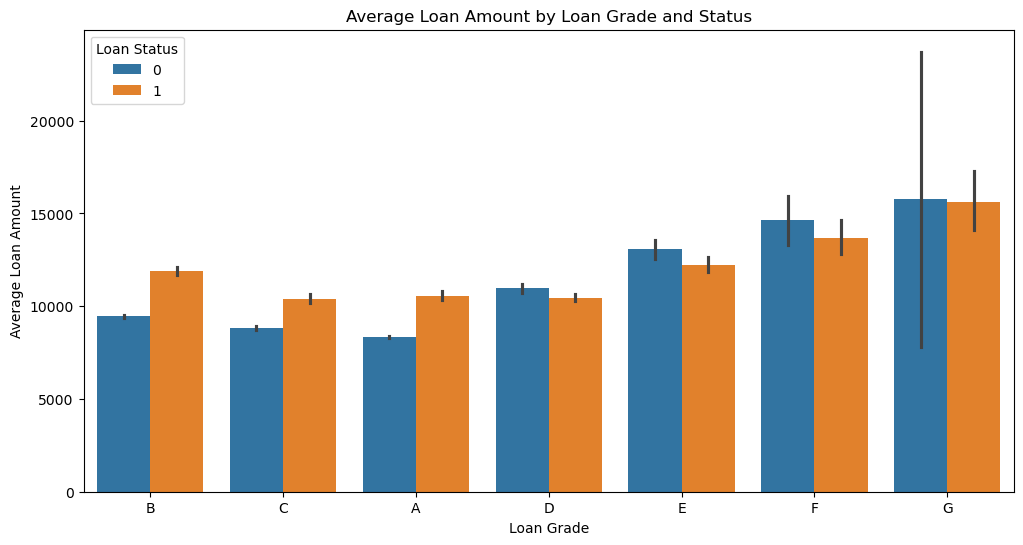

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

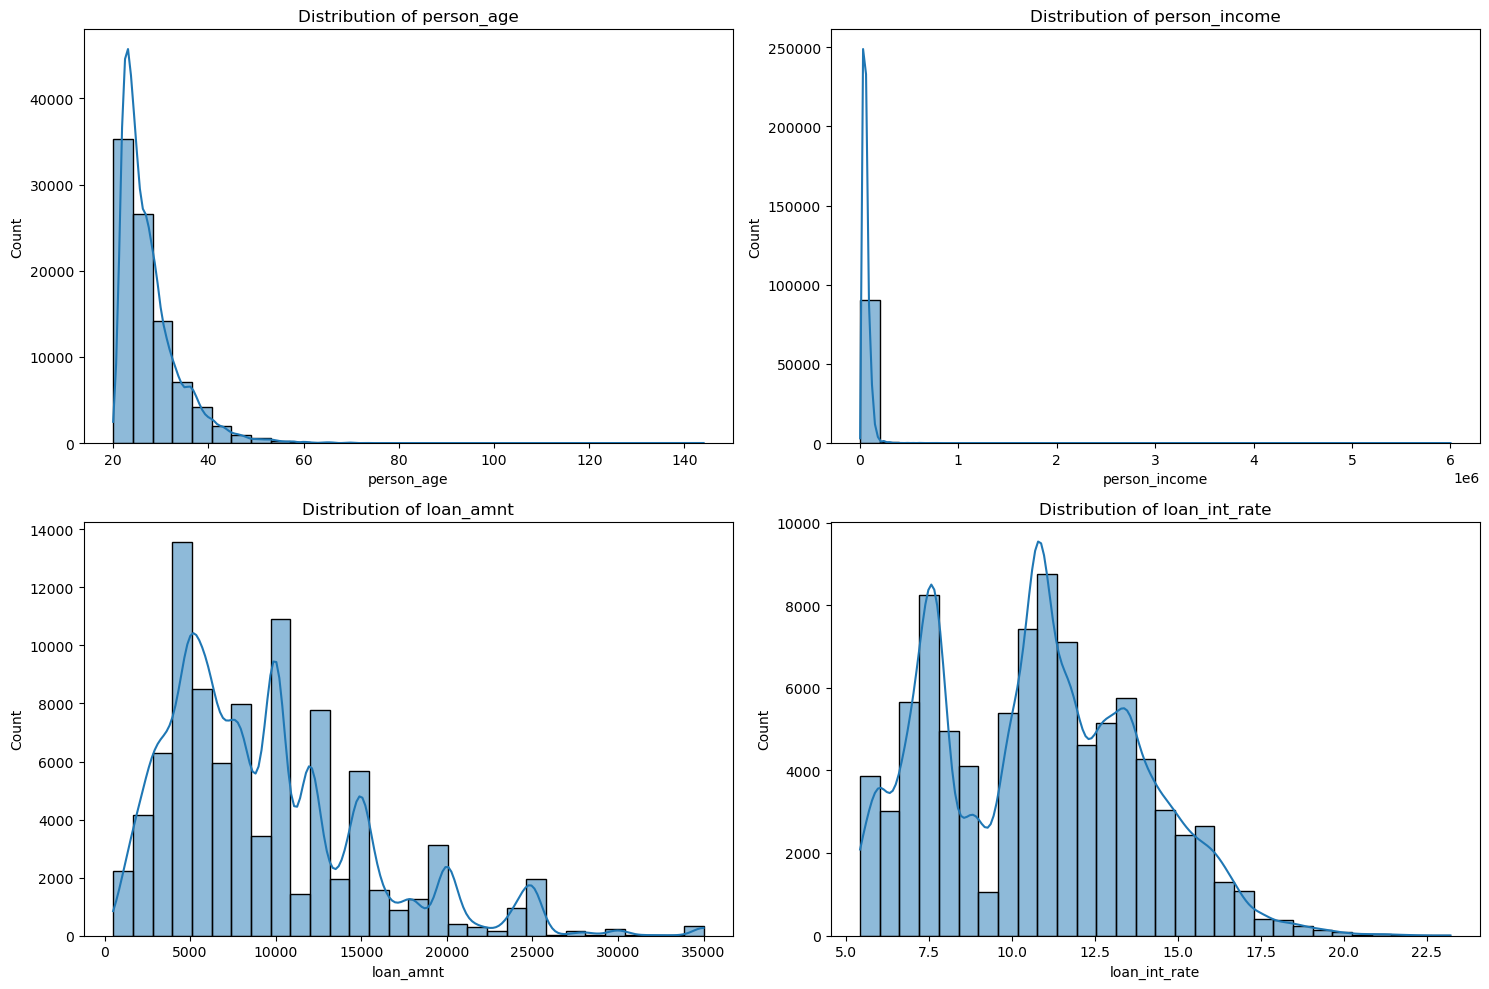

In [31]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

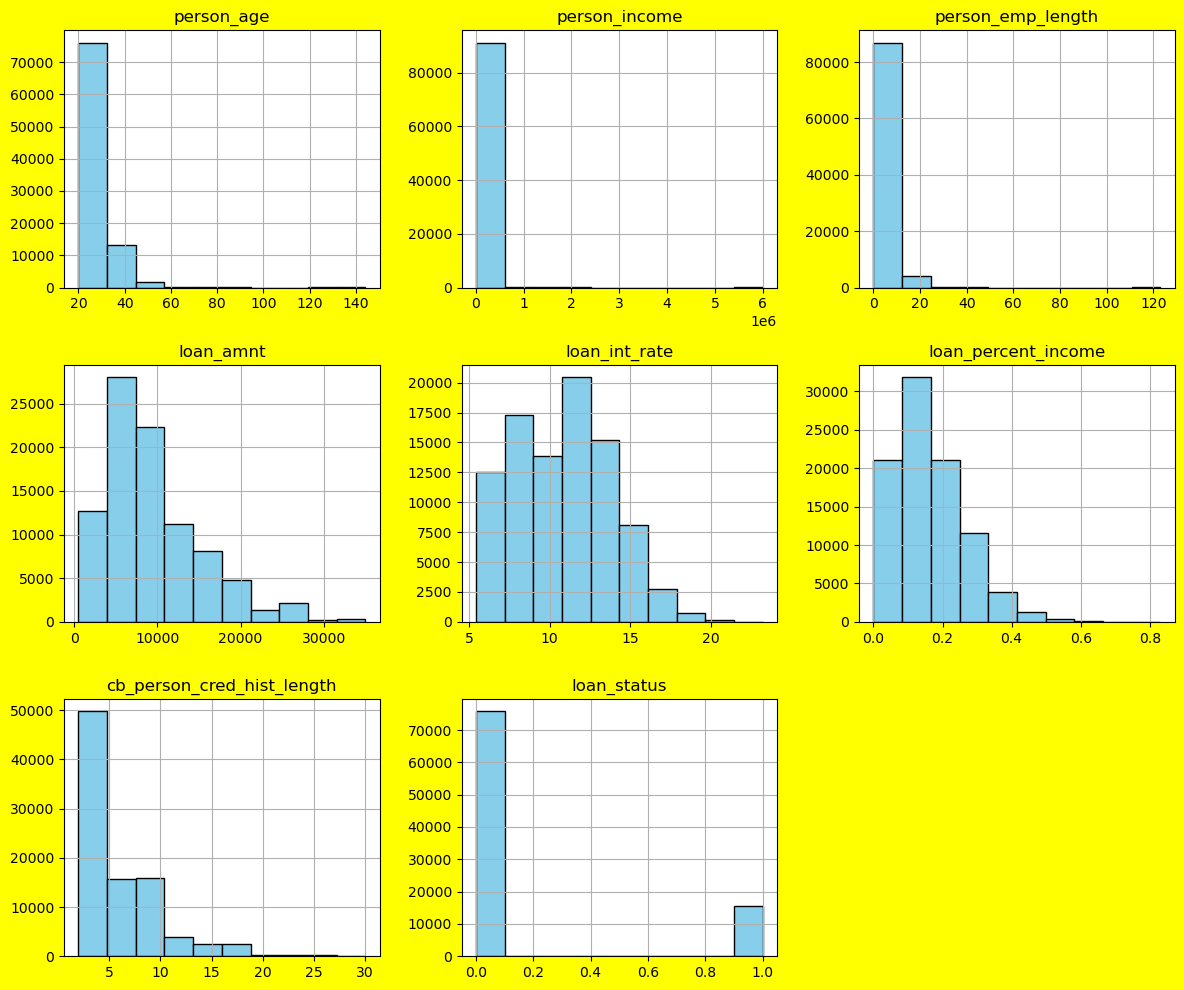

In [32]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

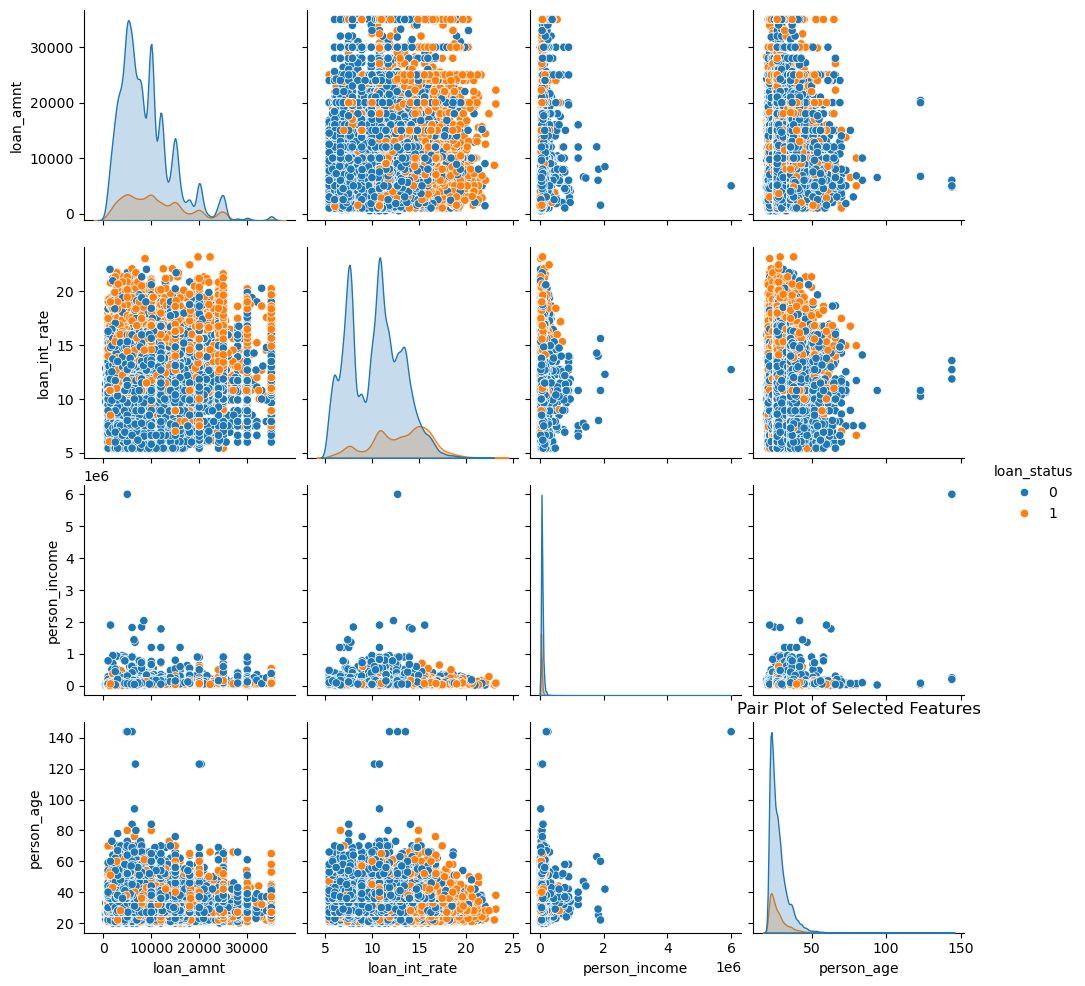

In [33]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(df_train[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [35]:
df_train = df_train_processed
df_test = df_test_processed

In [36]:
df_train.shape,df_test.shape

((91226, 16), (39098, 15))

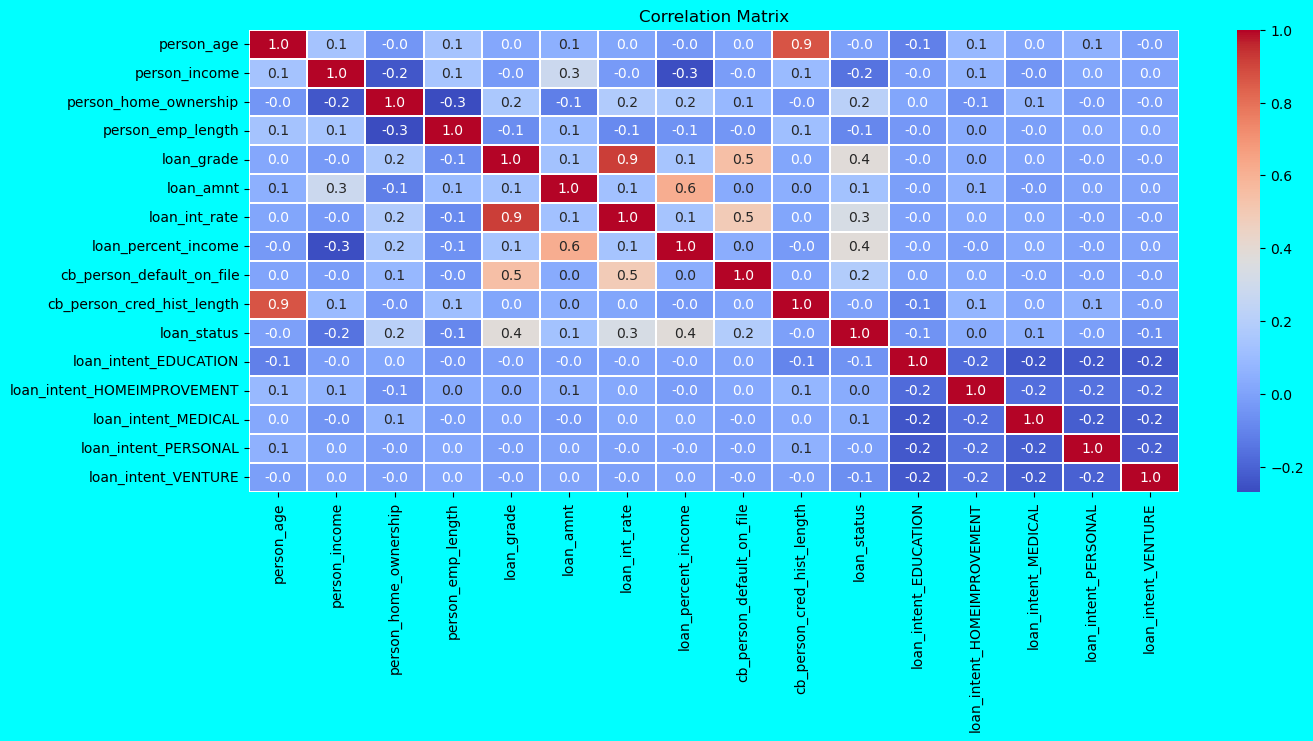

In [37]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')  
plt.title('Correlation Matrix')
plt.show()

In [38]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [39]:
df_test.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
dtype: int64

In [40]:
def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']  
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate'] 
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'])
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'])
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'])      
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'] 
    
    return df

#median_income = df_train['person_income'].median()
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [41]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [43]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from lightgbm import early_stopping

lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,  
    'feature_fraction': 0.6236144085285287, 
    'bagging_fraction': 0.9596685778433888, 
    'bagging_freq': 3,  
    'verbose': -1
}
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]    
   
    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc',
                   callbacks=[early_stopping(stopping_rounds=10)],
                   )    

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]   
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val    
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits
overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[462]	valid_0's auc: 0.958366	valid_0's binary_logloss: 0.159088
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[473]	valid_0's auc: 0.95863	valid_0's binary_logloss: 0.160838
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[517]	valid_0's auc: 0.955175	valid_0's binary_logloss: 0.165973
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[418]	valid_0's auc: 0.952605	valid_0's binary_logloss: 0.171883
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[477]	valid_0's auc: 0.957935	valid_0's binary_logloss: 0.161051
Overall AUC (LGBMClassifier with StratifiedKFold): 0.9564899010276572


In [45]:
catboost_params = {
    'depth': 7,
    'learning_rate': 0.19893301995319765,
    'bagging_temperature': 0.7979373495258176,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'iterations': 400,
    'grow_policy': 'Lossguide',
    'eval_metric': 'AUC',
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))
for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=True)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]  
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]  
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val    
    catboost_test_predictions += catboost_fold_test_preds / n_splits
overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_predictions)
print("Overall AUC (CatBoostClassifier with StratifiedKFold):", overall_metric_catboost)

0:	test: 0.8511688	best: 0.8511688 (0)	total: 33.8ms	remaining: 13.5s
1:	test: 0.8578288	best: 0.8578288 (1)	total: 63.9ms	remaining: 12.7s
2:	test: 0.8798502	best: 0.8798502 (2)	total: 94.7ms	remaining: 12.5s
3:	test: 0.8988666	best: 0.8988666 (3)	total: 127ms	remaining: 12.6s
4:	test: 0.9066845	best: 0.9066845 (4)	total: 157ms	remaining: 12.4s
5:	test: 0.9155118	best: 0.9155118 (5)	total: 192ms	remaining: 12.6s
6:	test: 0.9158664	best: 0.9158664 (6)	total: 226ms	remaining: 12.7s
7:	test: 0.9249141	best: 0.9249141 (7)	total: 261ms	remaining: 12.8s
8:	test: 0.9259767	best: 0.9259767 (8)	total: 299ms	remaining: 13s
9:	test: 0.9298488	best: 0.9298488 (9)	total: 331ms	remaining: 12.9s
10:	test: 0.9312738	best: 0.9312738 (10)	total: 364ms	remaining: 12.9s
11:	test: 0.9326235	best: 0.9326235 (11)	total: 396ms	remaining: 12.8s
12:	test: 0.9328330	best: 0.9328330 (12)	total: 429ms	remaining: 12.8s
13:	test: 0.9348778	best: 0.9348778 (13)	total: 464ms	remaining: 12.8s
14:	test: 0.9371712	best:

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

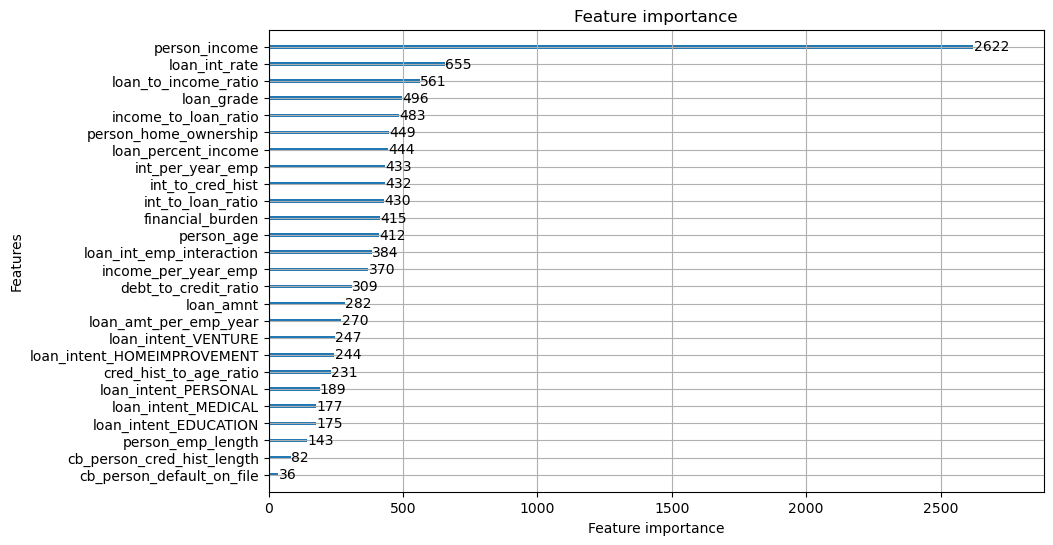

In [46]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

In [47]:
lgbm_model

LGBMClassifier(bagging_fraction=0.9596685778433888, bagging_freq=3,
               feature_fraction=0.6236144085285287,
               learning_rate=0.0322942967545754, max_depth=15,
               metric='binary_logloss', min_data_in_leaf=25, n_estimators=3000,
               num_leaves=24, objective='binary', random_state=42, verbose=-1)

In [48]:
import lime
import lime.lime_tabular

In [49]:
df_train.shape

(91226, 26)

In [50]:
df_train.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                          14  ...   
1                          0                           2  ...   
2                          0                          10  ...   
3                          0                           5  ...   
4                          0                           3  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0           68940.0                  inf                0.378378   
1           53400.0         9.333333e+03                0.090909   
2           53400.0         3.600000e+03                0.344828   
3          133320.0         5.000000e+03                0.166667   
4           41520.0         3.000000e+04                0.136364   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.001915                      0.00            428.571429   
1           0.003337                     80.10           2000.000000   
2           0.001483                     71.20            600.000000   
3           0.000926                    155.54           2400.000000   
4           0.001153                     13.84           2000.000000   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          0.820714               inf                    inf   
1          6.675000          2.225000             666.666667   
2          0.890000          1.112500             750.000000   
3          2.222000          0.793571             857.142857   
4          2.306667          3.460000            3000.000000   

   income_to_loan_ratio  
0              5.833333  
1             14.000000  
2              4.800000  
3              5.833333  
4             10.000000  

[5 rows x 26 columns]

In [51]:
df_test.shape

(39098, 26)

In [52]:
rows_with_inf = df_test[np.isinf(df_test).any(axis=1)]
print("Rows with infinity values:")
rows_with_inf

Rows with infinity values:


person_age  person_income  person_home_ownership  person_emp_length  \
8              32          29124                      3                0.0   
18             38          47000                      3                0.0   
61             25          75000                      0                0.0   
72             27          84000                      3                0.0   
75             29          40000                      2                0.0   
...           ...            ...                    ...                ...   
39063          35         510000                      3                0.0   
39068          35          34000                      3                0.0   
39069          34          70399                      3                0.0   
39078          25          52000                      2                0.0   
39095          51          60000                      0                0.0   

       loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
8               2       7200          13.11                 0.26   
18              0       9000           8.94                 0.19   
61              2      10000          15.96                 0.13   
72              0       7000           7.29                 0.08   
75              0       8000           8.00                 0.20   
...           ...        ...            ...                  ...   
39063           0       1800           7.12                 0.00   
39068           1      10000          11.71                 0.29   
39069           0       1000           8.59                 0.01   
39078           1       7500          10.38                 0.14   
39095           0      15000           7.51                 0.25   

       cb_person_default_on_file  cb_person_cred_hist_length  ...  \
8                              1                           6  ...   
18                             0                          11  ...   
61                             1                           3  ...   
72                             0                           5  ...   
75                             0                          10  ...   
...                          ...                         ...  ...   
39063                          0                           6  ...   
39068                          0                           5  ...   
39069                          0                           5  ...   
39078                          0                           3  ...   
39095                          0                          25  ...   

       financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
8               94392.0                  inf                0.187500   
18              80460.0                  inf                0.289474   
61             159600.0                  inf                0.120000   
72              51030.0                  inf                0.185185   
75              64000.0                  inf                0.344828   
...                 ...                  ...                     ...   
39063           12816.0                  inf                0.171429   
39068          117100.0                  inf                0.142857   
39069            8590.0                  inf                0.147059   
39078           77850.0                  inf                0.120000   
39095          112650.0                  inf                0.490196   

       int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
8               0.001821                       0.0           1200.000000   
18              0.000993                       0.0            818.181818   
61              0.001596                       0.0           3333.333333   
72              0.001041                       0.0           1400.000000   
75              0.001000                       0.0            800.000000   
...                  ...                       ...                   ...   
39063           0.003956   

In [53]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_train.head()

DataFrame after replacing inf with column means:


person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                          14  ...   
1                          0                           2  ...   
2                          0                          10  ...   
3                          0                           5  ...   
4                          0                           3  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0           68940.0         19519.454848                0.378378   
1           53400.0          9333.333333                0.090909   
2           53400.0          3600.000000                0.344828   
3          133320.0          5000.000000                0.166667   
4           41520.0         30000.000000                0.136364   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.001915                      0.00            428.571429   
1           0.003337                     80.10           2000.000000   
2           0.001483                     71.20            600.000000   
3           0.000926                    155.54           2400.000000   
4           0.001153                     13.84           2000.000000   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          0.820714          3.451274            2878.295562   
1          6.675000          2.225000             666.666667   
2          0.890000          1.112500             750.000000   
3          2.222000          0.793571             857.142857   
4          2.306667          3.460000            3000.000000   

   income_to_loan_ratio  
0              5.833333  
1             14.000000  
2              4.800000  
3              5.833333  
4             10.000000  

[5 rows x 26 columns]

In [54]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_test.head()

DataFrame after replacing inf with column means:


person_age  person_income  person_home_ownership  person_emp_length  \
0          23          69000                      3                3.0   
1          26          96000                      0                6.0   
2          26          30000                      3                5.0   
3          33          50000                      3                4.0   
4          26         102000                      0                8.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           5      25000          15.76                 0.36   
1           2      10000          12.68                 0.10   
2           4       4000          17.19                 0.13   
3           0       7000           8.90                 0.14   
4           3      15000          16.32                 0.15   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                           2  ...   
1                          1                           4  ...   
2                          1                           2  ...   
3                          0                           7  ...   
4                          1                           4  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0          394000.0              23000.0                0.086957   
1          126800.0              16000.0                0.153846   
2           68760.0               6000.0                0.076923   
3           62300.0              12500.0                0.212121   
4          244800.0              12750.0                0.153846   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.000630                     47.28               12500.0   
1           0.001268                     76.08                2500.0   
2           0.004298                     85.95                2000.0   
3           0.001271                     35.60                1000.0   
4           0.001088                    130.56                3750.0   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          7.880000          5.253333            8333.333333   
1          3.170000          2.113333            1666.666667   
2          8.595000          3.438000             800.000000   
3          1.271429          2.225000            1750.000000   
4          4.080000          2.040000            1875.000000   

   income_to_loan_ratio  
0              2.760000  
1              9.600000  
2              7.500000  
3              7.142857  
4              6.800000  

[5 rows x 26 columns]

In [55]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=X_train.columns, 
                                                   class_names=['0', '1'], 
                                                   kernel_width=5)

C:\Users\雷神\AppData\Local\Temp\ipykernel_21336\1230043500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\雷神\AppData\Local\Temp\ipykernel_21336\1230043500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


In [56]:
redict_fn_lgb = lambda x: lgbm_model.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['0','1'],kernel_width=5)

In [57]:
choosen_instance = X_val.loc[[32558]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [58]:
choosen_instance = X_val.loc[[32562]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [59]:
choosen_instance = X_val.loc[[25]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [60]:
choosen_instance = X_val.loc[[10]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [61]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

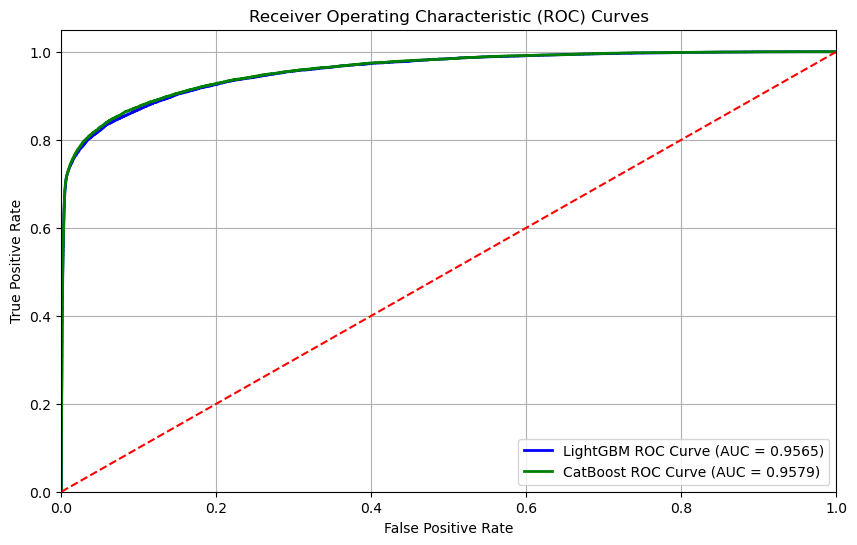

In [62]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(lgbm_true_labels, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [63]:
df_sub['loan_status'] = lgbm_test_predictions*0.2 + catboost_test_predictions*0.8 #+ xgb_test_predictions*0.0

In [64]:
df_sub.head()

id  loan_status
0  58645     0.998964
1  58646     0.035571
2  58647     0.556119
3  58648     0.012869
4  58649     0.063045

## Below is what we have implemented

In [67]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.


In [69]:
from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, false_positive_rate

In [122]:
from sklearn.metrics import accuracy_score
import numpy as np

def test_stability(model, X_data, y_true, noise_level=0.01):
    X_noisy = X_data.copy()
    numeric_cols = X_noisy.select_dtypes(include=np.number).columns
    X_noisy[numeric_cols] += np.random.normal(0, noise_level, X_noisy[numeric_cols].shape)
    y_pred_noisy = model.predict(X_noisy)
    y_pred_original = model.predict(X_data)
    return accuracy_score(y_true, y_pred_original), accuracy_score(y_true, y_pred_noisy)

# Run stability check on validation set
acc_original, acc_noisy = test_stability(lgbm_model, X_val, y_val)
print("LGBM Model")
print("Original Accuracy:", acc_original)
print("Noisy Accuracy:", acc_noisy)
print("Accuracy drop due to noise:", acc_original - acc_noisy)

LGBM Model
Original Accuracy: 0.9475472732255412
Noisy Accuracy: 0.9411893669498492
Accuracy drop due to noise: 0.0063579062756919935


In [123]:
acc_original, acc_noisy = test_stability(catboost_model, X_val, y_val)
print("CatBoost Model")
print("Original Accuracy:", acc_original)
print("Noisy Accuracy:", acc_noisy)
print("Accuracy drop due to noise:", acc_original - acc_noisy)

CatBoost Model
Original Accuracy: 0.9486434639627295
Noisy Accuracy: 0.941024938339271
Accuracy drop due to noise: 0.007618525623458439


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def subgroup_metrics(y_true, y_pred, sensitive_feature):
    groups = sensitive_feature.unique()
    results = {}
    for group in groups:
        idx = sensitive_feature == group
        results[group] = {
            "Accuracy": accuracy_score(y_true[idx], y_pred[idx]),
            "Precision": precision_score(y_true[idx], y_pred[idx]),
            "Recall": recall_score(y_true[idx], y_pred[idx]),
            "F1 Score": f1_score(y_true[idx], y_pred[idx])
        }
    return pd.DataFrame(results)


In [118]:
sensitive_feature = X_val['person_home_ownership']
y_pred = catboost_model.predict(X_val)
results_df = subgroup_metrics(y_val, y_pred, sensitive_feature)
results_df

2         0         3         1
Accuracy   0.986523  0.951469  0.942165  0.900000
Precision  0.756757  0.892308  0.944471  1.000000
Recall     0.823529  0.464000  0.822314  0.615385
F1 Score   0.788732  0.610526  0.879169  0.761905

In [119]:
sensitive_feature = X_val['person_home_ownership']
y_pred = lgbm_model.predict(X_val)
results_df = subgroup_metrics(y_val, y_pred, sensitive_feature)
results_df

2         0         3         1
Accuracy   0.985624  0.950551  0.941002  0.880000
Precision  0.736842  0.913333  0.952381  1.000000
Recall     0.823529  0.438400  0.809917  0.538462
F1 Score   0.777778  0.592432  0.875391  0.700000

In [120]:
sensitive_feature = X_val['loan_grade'] 
y_pred = catboost_model.predict(X_val) 
results_df = subgroup_metrics(y_val, y_pred, sensitive_feature)
results_df

2         0         1         3         4         5  \
Accuracy   0.919235  0.976217  0.950539  0.916435  0.894595  0.898734   
Precision  0.904494  0.946237  0.943249  0.936963  0.952830  0.920000   
Recall     0.563923  0.660000  0.637566  0.921127  0.874459  0.920000   
F1 Score   0.694714  0.777614  0.760852  0.928977  0.911964  0.920000   

                  6  
Accuracy   0.863636  
Precision  0.863636  
Recall     1.000000  
F1 Score   0.926829

In [121]:
sensitive_feature = X_val['loan_grade']
y_pred = lgbm_model.predict(X_val)
results_df = subgroup_metrics(y_val, y_pred, sensitive_feature)
results_df

2         0         1         3         4         5  \
Accuracy   0.918094  0.975587  0.949559  0.913092  0.886486  0.936709   
Precision  0.938272  0.955390  0.949698  0.940834  0.947867  0.959184   
Recall     0.532399  0.642500  0.624339  0.910798  0.865801  0.940000   
F1 Score   0.679330  0.768311  0.753392  0.925573  0.904977  0.949495   

                  6  
Accuracy   0.863636  
Precision  0.863636  
Recall     1.000000  
F1 Score   0.926829